<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/labs/cs473_lab_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 473 Lab Week 3

## Introduction:
In this lab, we'll explore both multivariate Gaussians and mixture models.

Mixture models are a powerful way to combine simple distributions to create complex distributions. Gaussian mixture modeling is a common place to start, because of the attractive theoretical properties of the model.

---
## Exercise #1: Data Generation
First, we'll practice sampling from a mixture model.

In [23]:
import numpy as np

def sample_mm( Mu, Sigma, Weight ):
    # Mu is a list of length k. Each entry in the list is a dx1 vector, representing the mean of the corresponding mixture component
    # Sigma is a list of length k. Each entry is a dxd matrix, representing the corresponding covariance matrix
    # Weight is a list of length k. Each entry is a 1x1 scalar, representing the prior probability of that component
    #
    # Your code should return a single sample from the mixture. It should be a dx1 vector.

    # NOTE: the only sampling functions you can use are np.random.randn and np.random.choice (don't use np.random.multivariate_normal)
    # you can use other math functions as needed
    # HINT: Look at section 7.6.3 of the book for a way to sample from a Multivariate Gaussian

    i = np.random.choice(len(Mu), p=Weight)

    z = np.random.randn(Mu[i].shape[0])
    L = np.linalg.cholesky(Sigma[i])
    x = Mu[i] + np.dot(L, z)

    return x.flatten()

In [13]:
# our mixture model

mu_1 = np.array([[0.22], [0.45]])
mu_2 = np.array([[0.5], [0.5]])
mu_3 = np.array([[0.77], [0.55]])
Mu = np.array([mu_1, mu_2, mu_3])

Sigma1 = np.array([[0.011, -0.01], [-0.01, 0.018]])
Sigma2 = np.array([[0.018, 0.01], [0.01, 0.011]])
Sigma3 = Sigma1
Sigma = np.array([Sigma1, Sigma2, Sigma3])

### Now, visualize the results and compare to the expected shapes
Here is some simple code for visualizing the level sets of a Gaussian

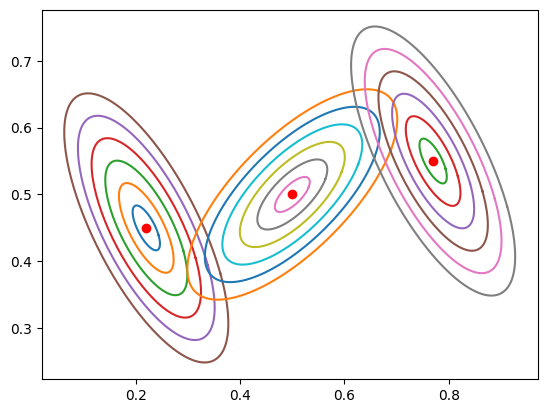

In [14]:
import matplotlib.pyplot as plt
from scipy import linalg

def sigmaEllipse2D(mu, Sigma, level=3, npoints=128):
    """
    SIGMAELLIPSE2D generates x,y-points which lie on the ellipse describing
    a sigma level in the Gaussian density defined by mean and covariance.

    Input:
        MU          [2 x 1] Mean of the Gaussian density
        SIGMA       [2 x 2] Covariance matrix of the Gaussian density
        LEVEL       Which sigma level curve to plot. Can take any positive value,
                    but common choices are 1, 2 or 3. Default = 3.
        NPOINTS     Number of points on the ellipse to generate. Default = 32.

    Output:
        XY          [2 x npoints] matrix. First row holds x-coordinates, second
                    row holds the y-coordinates. First and last columns should
                    be the same point, to create a closed curve.
    """
    phi = np.linspace(0, 2 * np.pi, npoints)
    x = np.cos(phi)
    y = np.sin(phi)
    z = level * np.vstack((x, y))
    xy = mu + linalg.sqrtm(Sigma).dot(z)
    return xy

def plot_sigma_levels(mu, P):
    xy_1 = sigmaEllipse2D(mu, P, 0.25)
    xy_2 = sigmaEllipse2D(mu, P, 0.5)
    xy_3 = sigmaEllipse2D(mu, P, 0.75)
    xy_4 = sigmaEllipse2D(mu, P, 1)
    xy_5 = sigmaEllipse2D(mu, P, 1.25)
    xy_6 = sigmaEllipse2D(mu, P, 1.5)
    plt.plot(xy_1[0], xy_1[1])
    plt.plot(xy_2[0], xy_2[1])
    plt.plot(xy_3[0], xy_3[1])
    plt.plot(xy_4[0], xy_4[1])
    plt.plot(xy_5[0], xy_5[1])
    plt.plot(xy_6[0], xy_6[1])
    plt.plot(mu[0], mu[1], "ro")


for i in range( len(Mu) ):
    plot_sigma_levels(Mu[i], Sigma[i])

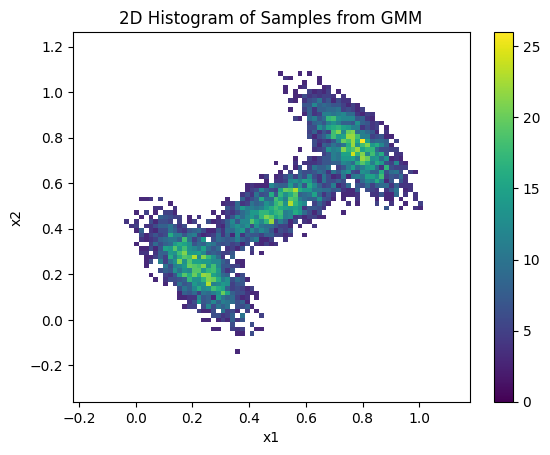

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# sample data

N = 10000
Weight = np.array([1/3, 1/3, 1/3])
results = [ sample_mm( Mu, Sigma, Weight ) for _ in range(N) ]

results_array = np.array(results)

#
# create a visualization of the data generated.  (perhaps something like sns.histplot?) Compare it to the level set plots in the previous cell. Do they match?
#

sns.histplot(
    x = results_array[:,0],
    y = results_array[:,1],
    bins = 75,       # adjust for resolution
    pthresh = 0.05,
    cmap = "viridis",
    cbar = True
)

plt.title("2D Histogram of Samples from GMM")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

---
## Exercise #2: Marginals
One way to sample from a marginal distribution is to sample from a joint distribution, and throw away the variables that have been marginalized out.  We're going to compare empirical and exact distributions.

You should perform the following:

* Sample from a multivariate Gaussian p(x,y) with the given parameters
* For each sample, throw away the second number (the "y" coordinate)
* Plot the resulting distribution of datapoints

Then, use the equations in the book to calculate the exact density of the marginal distribution over the first dimension (the "x" variable)


In [ ]:
# Use these parameters
mu = np.array([[0.22], [0.45]])
sigma = np.array([[0.011, -0.01], [-0.01, 0.018]])

# YOUR CODE HERE

# Sample
# Plot the empirical distribution of points (using, for example, a histogram plotting function)
# Plot the true density curve

Now, calculate the density of several points:

* Calculate p(y=0.39)
* Calculate p(y=0.2)

In [ ]:
# YOUR CODE HERE

---
## Exercise #3: Conditionals
Now, let's explore the difference between marginals and conditionals.

Use the following joint distribution over 4 variables:

In [ ]:
import seaborn as sns

df = sns.load_dataset("penguins")

data = np.array( df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
data = data[~np.isnan(data).any(axis=1)] # drop any row with a NaN
data[:,2] /= 200 # scale some stuff
data[:,3] /= 3000

mu = np.mean( data, axis=0 )
sigma = np.cov( data.T )

In [ ]:
print(mu)
print(sigma)

We'll assume that we have a multivariate normal distribution over 4 variables: p(x1,x2,x3,x4) = N( mu, sigma )

Now, we want to compute the mean of various conditionals

In [ ]:
# Compute the parameters of p(x2,x3)  (a marginal)

marg_mu_x2_x3 = XXX;
marg_sigma_x2_x3 = XXX;

print( marg_mu_x2_x3 )
print( marg_sigma_x2_x3 )

In [ ]:
# Compute the parameters or p(x2,x3|x1=34,x4=1.2)

cond_mu_x2_x3 = XXX;
cond_sigma_x2_x3 = XXX;

print( cond_mu_x2_x3 )
print( cond_sigma_x2_x3 )

In [ ]:
# Finally, calculate the density of a specific point:

# calculate p(x2=16, x3=0.99)
print()

# calculate p(x2=16, x3=0.99 | x1=34,x4=1.2)
print()